<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>  

# Learning Objectives

Towards the end of this lesson, you should be able to:
- perform classification with Logistic Regression, k-NN, and Naive Bayes
- evaluate classification performance with various metrics

---

Go through the codes and explanation in this notebook to familiarize with classification.<br>
Complete the task given at the end of this notebook by following the given instructions for your Week 8 attendance.



---



### For Google Colab Use Only
Skip this section if you are using Jupyter Notebook etc.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
drive_path = '/content/drive/MyDrive/Trimester/2310/TDS3301/Tutorials/Tutorial 6/' #set your google drive path

---

Classification is one of the most common data mining task. For python, many of the required functions and models are easily available under the [scikit-learn](https://scikit-learn.org/stable/) package.

For starters, import a few necessary libraries and also load the dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#settings for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

#code to ensure path
try:
  drive_path
except NameError:
  drive_path = ''

#load dataset
df = pd.read_csv(drive_path + 'banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Data Exploration
Prior to classification, let's do some brief exploration of the data:

In [2]:
#understanding rows and attribute types
print('No. of records and attributes: ',df.shape)
print('List of attributes: ',df.columns)
display(df.info())

No. of records and attributes:  (41188, 21)
List of attributes:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null 

None

In [3]:
#exploring basic distribution of numerical data
df.select_dtypes(['int64','float64']).describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [4]:
#exploring categotical data
df.select_dtypes(['object']).describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [5]:
#check values of each categorical attribute
cat_attributes = df.select_dtypes(['object']).columns
for i in cat_attributes:
  values = df[i].unique().tolist()
  print(i,': ',values)

job :  ['blue-collar', 'technician', 'management', 'services', 'retired', 'admin.', 'housemaid', 'unemployed', 'entrepreneur', 'self-employed', 'unknown', 'student']
marital :  ['married', 'single', 'divorced', 'unknown']
education :  ['basic.4y', 'unknown', 'university.degree', 'high.school', 'basic.9y', 'professional.course', 'basic.6y', 'illiterate']
default :  ['unknown', 'no', 'yes']
housing :  ['yes', 'no', 'unknown']
loan :  ['no', 'yes', 'unknown']
contact :  ['cellular', 'telephone']
month :  ['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep', 'dec']
day_of_week :  ['thu', 'fri', 'tue', 'mon', 'wed']
poutcome :  ['nonexistent', 'success', 'failure']


Basic exploration seems to show that the dataset attributes are appropriately formatted but there are some cases with what can be considered as missing data, indicated by the `unknown` and `nonexistent` values. There are two ways to handle these, either to treat them as missing data, and fill in with some estimated values, or to consider them as a valid value for the attribute. We will take note of this for the preprocessing later.

Next, lets try some visualizations:

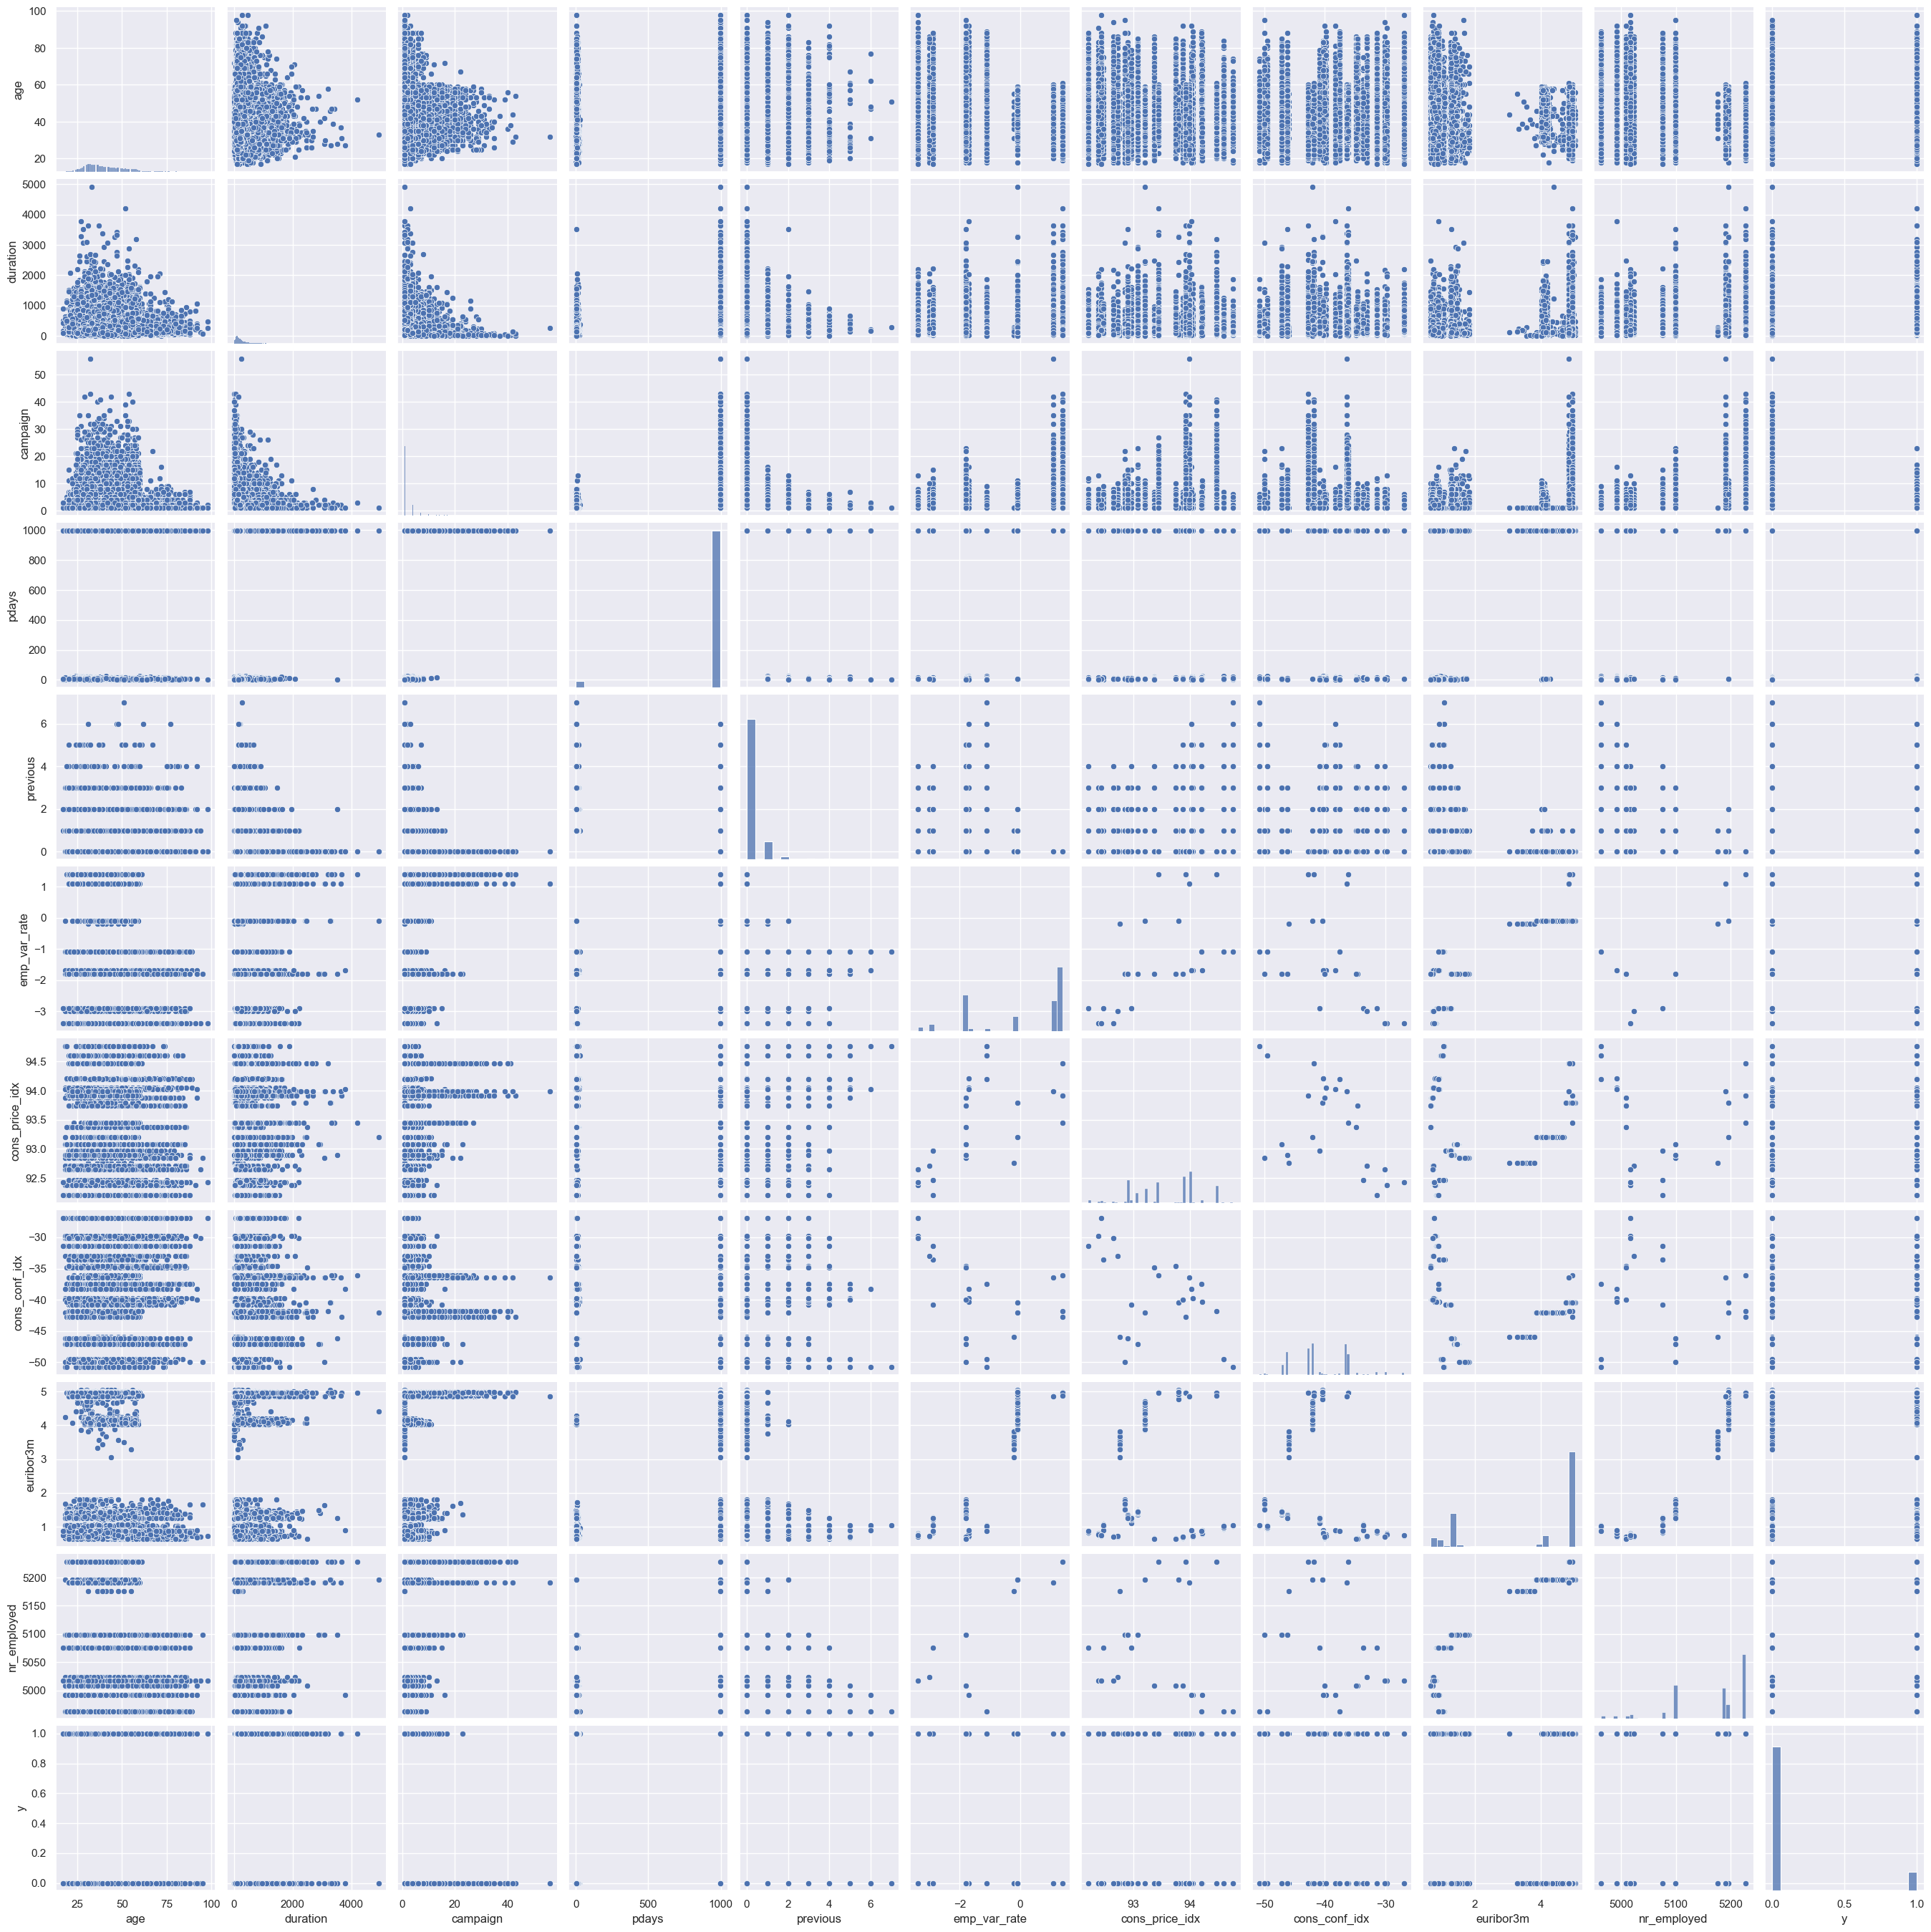

In [6]:
#Visualize numerical data distribution and pairwise scatter plots
#Note: may take time to execute
sns.pairplot(df.select_dtypes(['int64','float64']))

Look through the pairplots. You will notice that the attribute `y` only contains only 0 and 1. In fact, `y` is the target attribute for binary classification (1 = have subscription, 0 = no subscription). Let's visualize the distribution:

<AxesSubplot: xlabel='y', ylabel='count'>

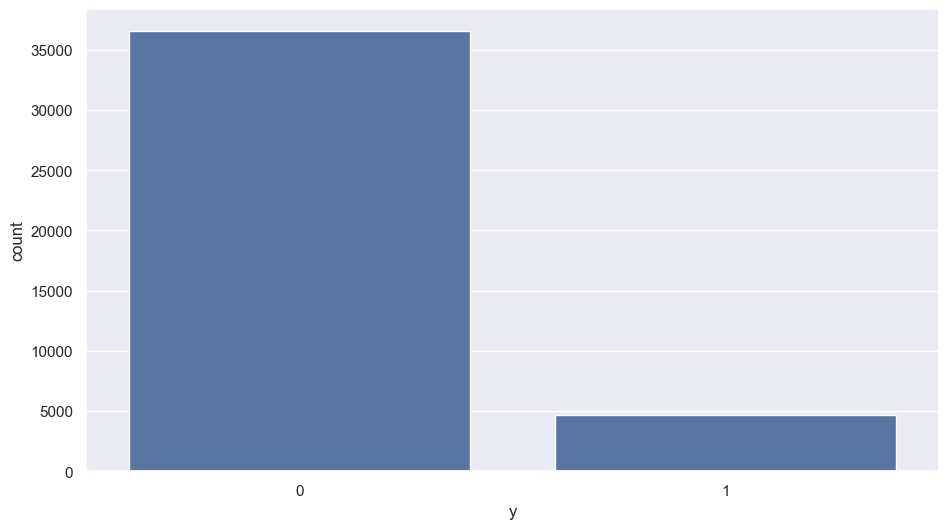

In [7]:
sns.countplot(x='y', data = df)

Seems like the binary classes are significantly imbalanced. We will have to balance the data later during preprocessing.<br>

Now let's have a look at the distributions of the categorical data via visualizations:

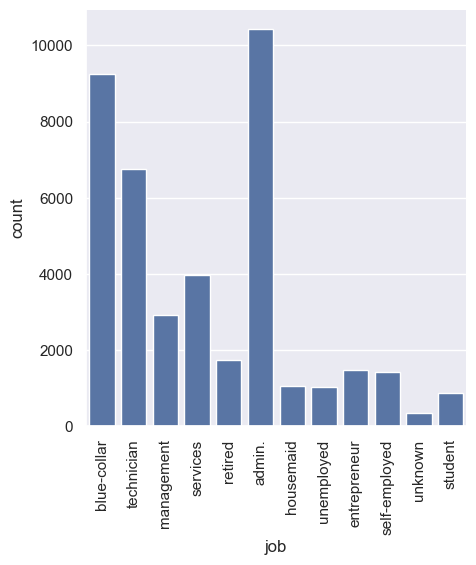

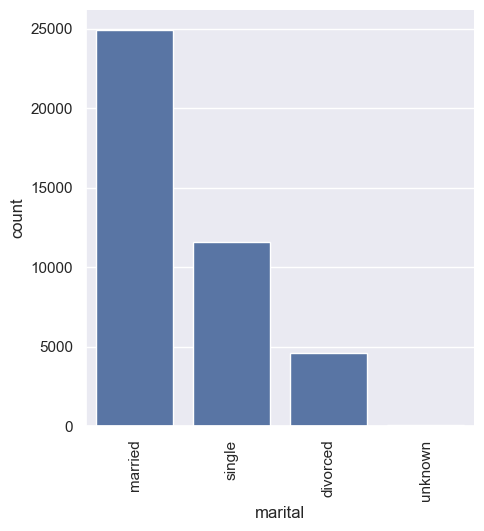

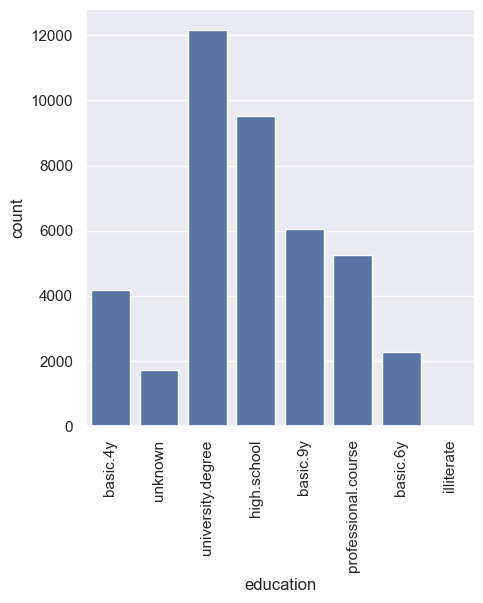

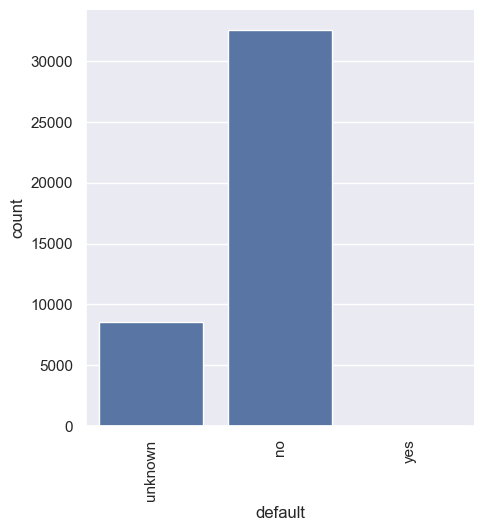

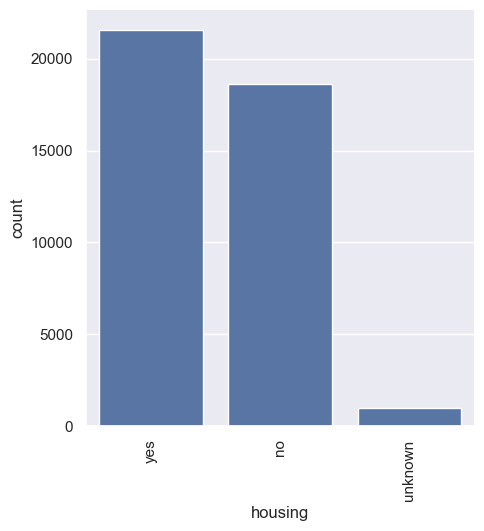

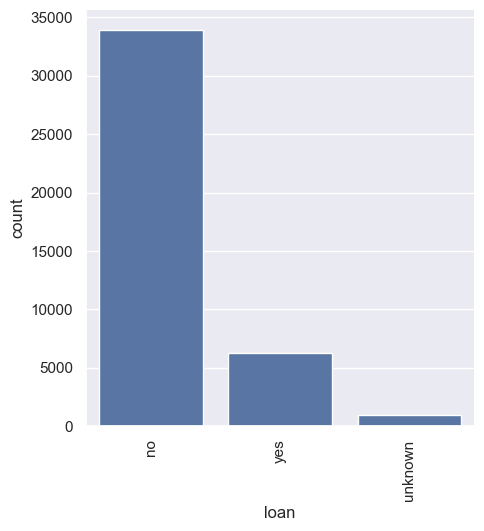

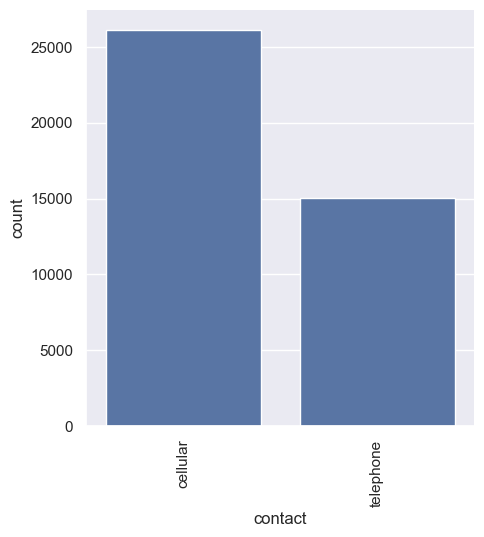

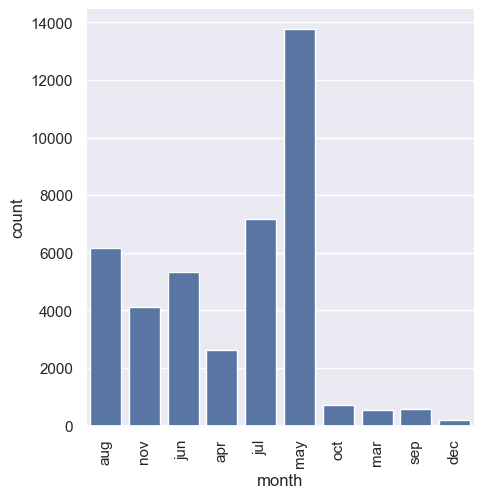

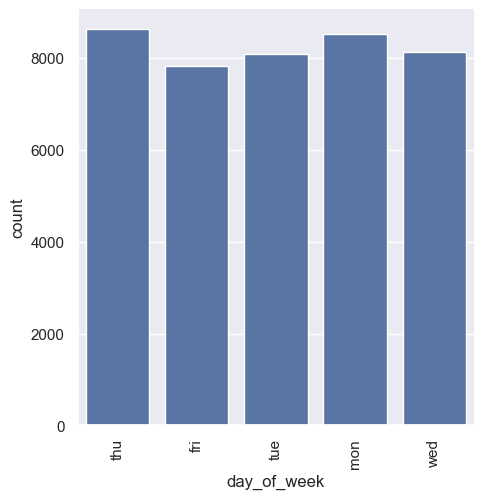

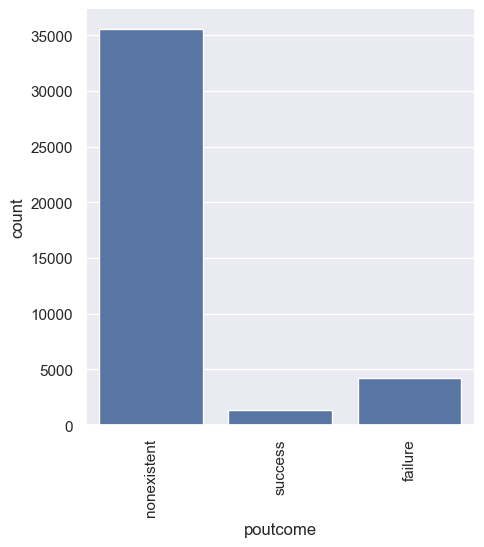

In [8]:
for i in range(10):
  ax = sns.catplot(data=df,x=cat_attributes[i],kind='count')
  ax.set_xticklabels(rotation=90)

Each attribute has varying degrees of imbalance, but it is not necessary to balance these as they are going to be used as features. More importantly is the balance of the target class for classifier training.

However, do note the `education` attributes has 3 separate values of basic, `basic.4y`, `basic.6y`, and `basic.9y`. We may consider combining them into a single `basic` attribute for simplicity.

---

**Detour**: Visualizing Missing data using [`missingno` package](https://github.com/ResidentMario/missingno).<br>
There is a handy package that can be used to visualize missing data instead of the typical text printing. This is an optional part to visualize missing data, so let's convert the `unknown` and `nonexistent` values to `NaN` and visualize them.

In [9]:
#replace with NaN
df_cat = df.select_dtypes(['object'])
df_cat.replace(['unknown','nonexistent'],np.nan,inplace=True)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          40858 non-null  object
 1   marital      41108 non-null  object
 2   education    39457 non-null  object
 3   default      32591 non-null  object
 4   housing      40198 non-null  object
 5   loan         40198 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     5625 non-null   object
dtypes: object(10)
memory usage: 3.1+ MB


In [10]:
#install package
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot: >

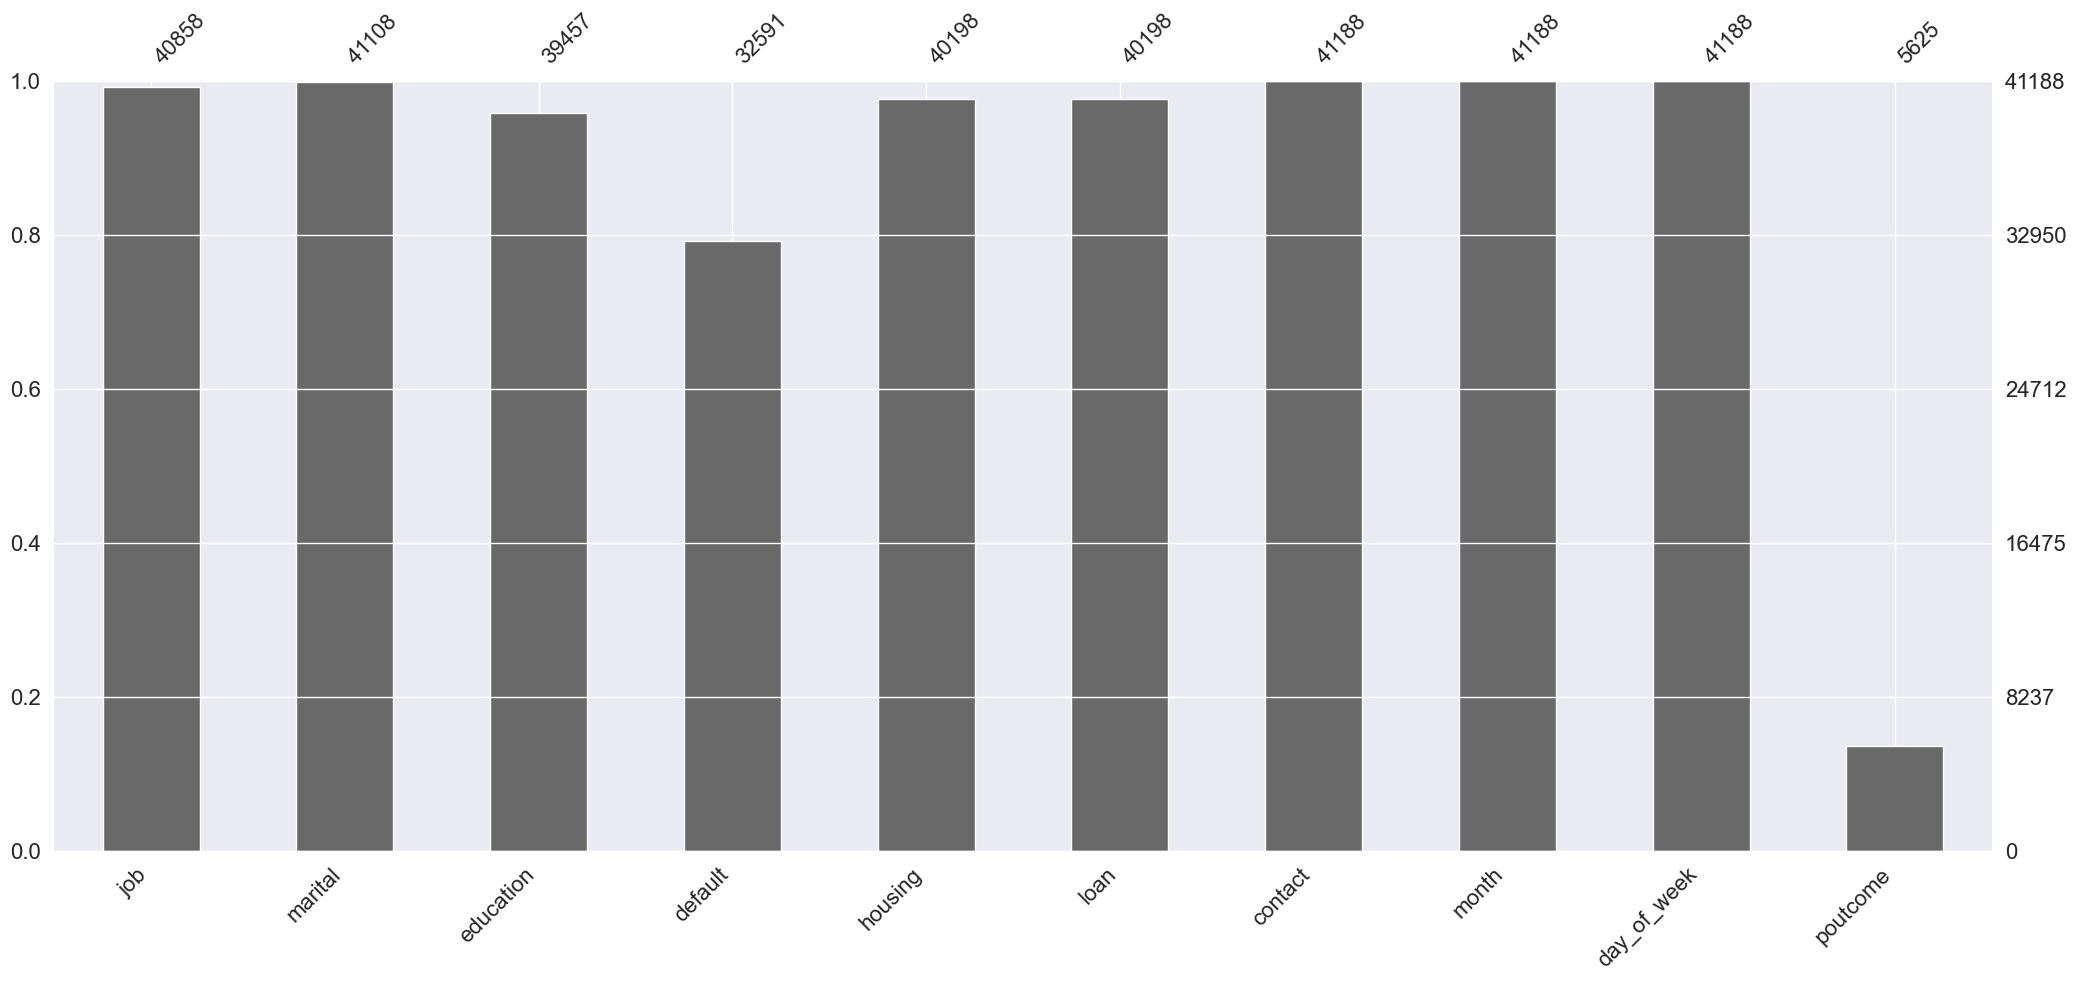

In [11]:
import missingno as msno

msno.bar(df_cat) #visualilze missing data in categorical attributes

The bars indicate the available data. The shorter the bar, the more missing values. In this case the `poutcome` attribute has the most missing values among all the attributes.

End detour.

---

Based on the previous exploration, there are a few simple issues for consideration:
* Missing data: `unknown` and `nonexistent` values
* Values granularity: `education` attribute contains 3 levels of `basic`
* Imbalanced data: Target binary class `y` highly imbalance

For simplicity of this tutorial, we will remain the `unknown` and `nonexistent` values for the next task (you are free to add your own codes to do the cleaning). Instead, we will focus on the other two issues, combining the `basic` values, and most importantly, balancing the `y` class.

*Note*: You can also further investigate the correlations (`corr`) and class specific distributions (`groupby`) of the attributes for data reduction, etc.

## Data Preprocessing

Let's perform simple data transformation on the `education` attibutes by combining the values of `basic.4y`, `basic.6y`, and `basic.9y` into a single `basic` value so that they are less granular.

In [12]:
df_pp = df.copy()
#another way to replace values using numpy
df_pp['education']=np.where(df_pp['education'] =='basic.9y', 'Basic', df_pp['education'])
df_pp['education']=np.where(df_pp['education'] =='basic.6y', 'Basic', df_pp['education'])
df_pp['education']=np.where(df_pp['education'] =='basic.4y', 'Basic', df_pp['education'])

In [13]:
#check unique values for each attribute
for i in cat_attributes:
  values = df_pp[i].unique().tolist()
  print(i,': ',values)

job :  ['blue-collar', 'technician', 'management', 'services', 'retired', 'admin.', 'housemaid', 'unemployed', 'entrepreneur', 'self-employed', 'unknown', 'student']
marital :  ['married', 'single', 'divorced', 'unknown']
education :  ['Basic', 'unknown', 'university.degree', 'high.school', 'professional.course', 'illiterate']
default :  ['unknown', 'no', 'yes']
housing :  ['yes', 'no', 'unknown']
loan :  ['no', 'yes', 'unknown']
contact :  ['cellular', 'telephone']
month :  ['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep', 'dec']
day_of_week :  ['thu', 'fri', 'tue', 'mon', 'wed']
poutcome :  ['nonexistent', 'success', 'failure']


After handling that, we can look into balancing the data. We can use the SMOTE method from the `imblearn` package again. But before balancing, we should split the dataset in order to avoid data leakage, i.e. duplicates of the training data in the test set. <br>
Let's split the data to training and test sets using the handy function `train_test_split` from scikit-learn:

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = df_pp.loc[:, df_pp.columns != 'y']
y = df_pp.loc[:, df_pp.columns == 'y']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)
#use stratification to ensure each class sampled as testing set

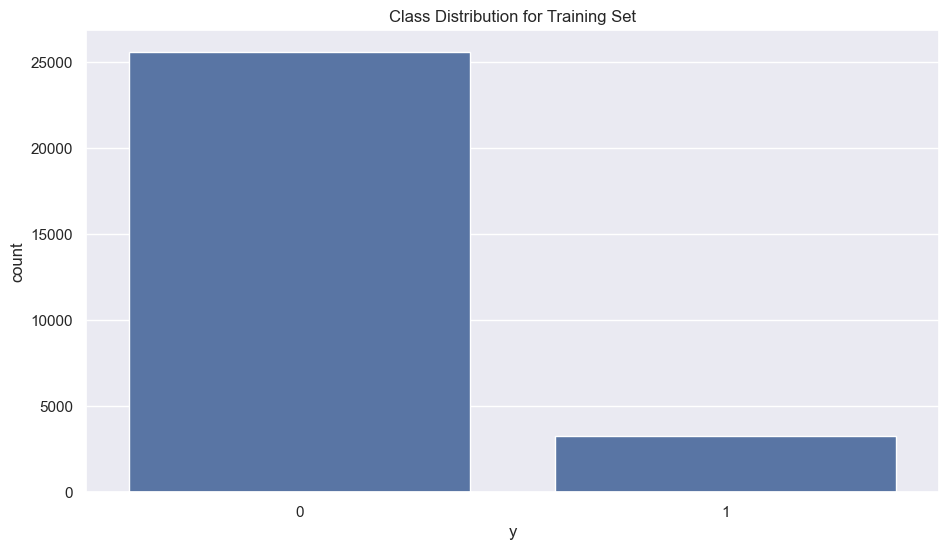

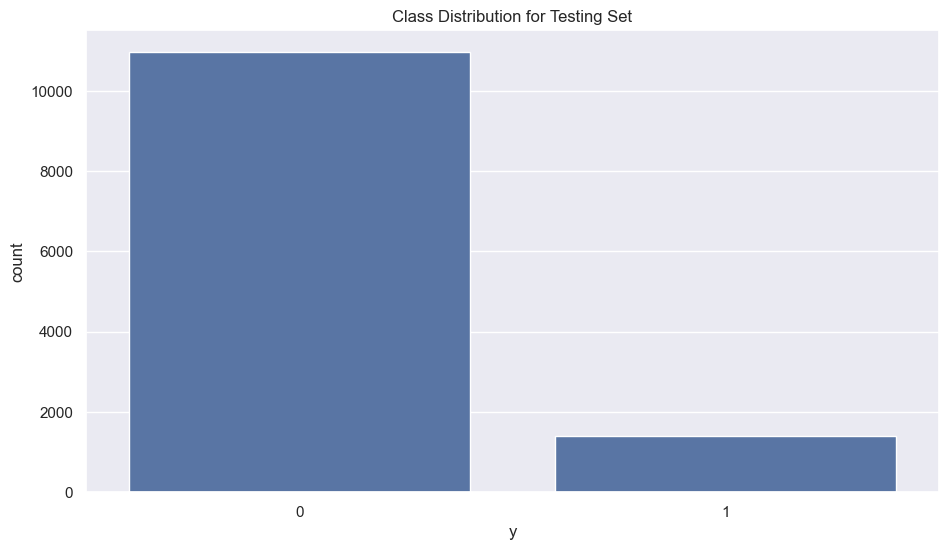

In [15]:
#visualize classes after splitting
plt.figure()
sns.countplot(x='y', data = pd.DataFrame({'y':y_train}))
plt.title('Class Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='y', data = pd.DataFrame({'y':y_test}))
plt.title('Class Distribution for Testing Set')
plt.show()

Now that we have splitted the data, we can proceed to balance the training set using SMOTE. pip install the `imblearn` package (if not already installed):

In [16]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


For the current dataset, we have both numerical and categorical attributes. Therefore, we need to use SMOTENC, which requires the numerical data to be normalized, and also need to explicitly specify the index of the categorical columns. The following code extracts the indices of categorical columns and then normalizes the numerical values:

In [17]:
#get index of categorical attributes
cat_index = []
for i in cat_attributes:
  cat_index.append(X_train.columns.get_loc(i))
display(cat_index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 14]

In [18]:
#normalize numerical attributes
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_preprocess = X_train.copy()
num_attributes = X_train.select_dtypes(['int64','float64']).columns
X_train_preprocess[num_attributes] = min_max_scaler.fit_transform(X_train_preprocess[num_attributes])
# X_train_preprocess = pd.DataFrame(X_train_preprocess, columns = num_attributes)
display(X_train_preprocess)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
27598,0.419753,technician,divorced,high.school,unknown,no,no,cellular,aug,tue,0.032940,0.036364,1.0,0.000000,nonexistent,1.000000,0.484412,0.615063,0.982544,1.000000
31026,0.320988,management,married,university.degree,no,no,no,cellular,apr,mon,0.009760,0.018182,1.0,0.166667,failure,0.333333,0.340608,0.154812,0.174790,0.512287
24524,0.172840,management,married,university.degree,no,no,no,telephone,jun,fri,0.020537,0.036364,1.0,0.000000,nonexistent,1.000000,0.882307,0.376569,0.980503,1.000000
3744,0.197531,technician,divorced,professional.course,no,no,no,telephone,may,mon,0.027044,0.036364,1.0,0.000000,nonexistent,0.937500,0.698753,0.602510,0.957379,0.859735
21460,0.098765,admin.,single,Basic,no,no,no,cellular,jul,thu,0.003660,0.509091,1.0,0.000000,nonexistent,1.000000,0.669135,0.338912,0.982544,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37386,0.234568,technician,married,university.degree,no,no,no,cellular,nov,wed,0.044937,0.054545,1.0,0.000000,nonexistent,0.687500,0.389322,0.368201,0.790297,0.877883
4563,0.111111,blue-collar,single,Basic,unknown,yes,no,cellular,jul,tue,0.025620,0.036364,1.0,0.000000,nonexistent,1.000000,0.669135,0.338912,0.980957,1.000000
37206,0.493827,technician,divorced,professional.course,no,yes,yes,cellular,jul,thu,0.047784,0.000000,1.0,0.000000,nonexistent,1.000000,0.669135,0.338912,0.981410,1.000000
23858,0.222222,self-employed,married,university.degree,no,no,no,telephone,jul,wed,0.020333,0.036364,1.0,0.000000,nonexistent,1.000000,0.669135,0.338912,0.981410,1.000000


With the normalized data and categorical columns' indices, we can now import and initialize the SMOTENC method, and perform the over sampling:

In [19]:
from imblearn.over_sampling import SMOTENC

ovr_samp = SMOTENC(random_state=0, categorical_features=cat_index)
X_ovr_samp,y_ovr_samp=ovr_samp.fit_resample(X_train_preprocess, y_train)
X_ovr_samp = pd.DataFrame(data=X_ovr_samp,columns=X_train_preprocess.columns)

Let's inspect the over sampled dataset:

In [20]:
X_ovr_samp.shape

(51166, 20)

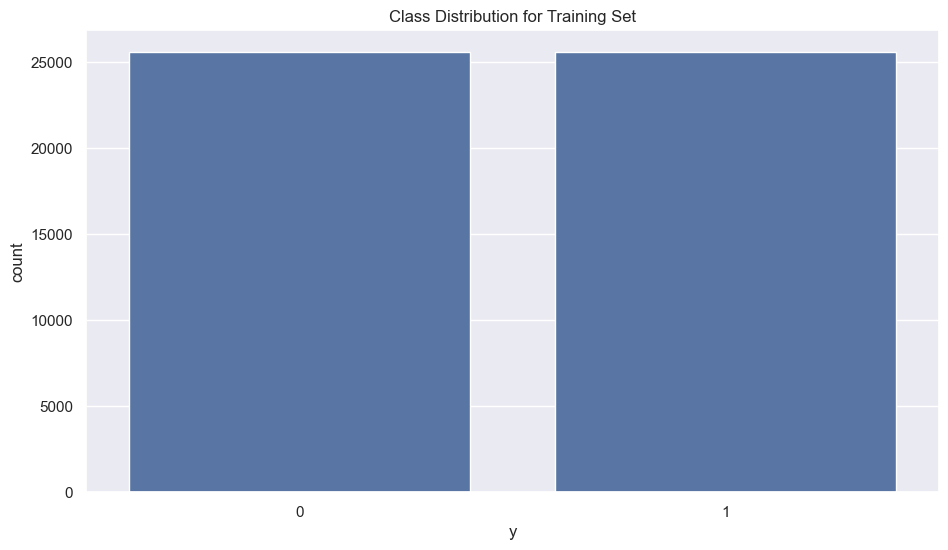

In [21]:
plt.figure()
sns.countplot(x='y', data = pd.DataFrame(data=y_ovr_samp,columns=['y']))
plt.title('Class Distribution for Training Set')
plt.show()

We now have increased the number of rows in the dataset, and the class values of y are also balanced. We can finally use this data to train classification models.

---

## Classification

Up until this point we current have a balanced training dataset, and a testing set for evaluation. In this section, we will train various classifiers, evaluate and compare the results. Most traditional classifiers are available in the scikit-learn package, but there are also alternatives available from other packages like Statsmodel, etc. Depending on the type of classifiers selected, additionally preprocessing might be needed to convert the attributes into the required type.

### Logistic Regression
The Logistic Refression is a statistical classifier for binary classification. In scikit-learn, it is under the class of linear models. However, we are not able to directly use the categorical attributes to train the model. Hence, we must first convert the attributes into the one-hot-encoding format using the `get_dummies` function from pandas, and this needs to be done for both the training and testing data attributes.
*Note*: scikit-learn also has an [encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for the transformation. Feel free to explore the usage.
Try out the following code and understand the process:

In [22]:
X_train_rows = len(X_ovr_samp) #save the number of rows of training data
X_train_test = pd.concat(objs=[X_ovr_samp, X_test], axis=0) #concatenate the training and testing attributes
X_train_test_onehot = pd.get_dummies(X_train_test, columns=cat_attributes) #convert categorical attributes to one hot encoding format
#split the training and testing attributes back into individual variables
X_train_onehot = X_train_test_onehot[:X_train_rows]
X_test_onehot = X_train_test_onehot[X_train_rows:]

display(X_train_onehot)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.419753,0.032940,0.036364,1.000000,0.000000,1.000000,0.484412,0.615063,0.982544,1.000000,...,False,False,False,False,False,True,False,False,True,False
1,0.320988,0.009760,0.018182,1.000000,0.166667,0.333333,0.340608,0.154812,0.174790,0.512287,...,False,False,False,True,False,False,False,True,False,False
2,0.172840,0.020537,0.036364,1.000000,0.000000,1.000000,0.882307,0.376569,0.980503,1.000000,...,False,False,True,False,False,False,False,False,True,False
3,0.197531,0.027044,0.036364,1.000000,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,...,False,False,False,True,False,False,False,False,True,False
4,0.098765,0.003660,0.509091,1.000000,0.000000,1.000000,0.669135,0.338912,0.982544,1.000000,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51161,0.127067,0.119428,0.016344,1.000000,0.000000,0.000000,0.069369,0.878661,0.037557,0.203781,...,False,True,False,False,False,True,False,False,True,False
51162,0.276016,0.225814,0.050214,1.000000,0.000000,0.937500,0.698753,0.602510,0.957153,0.859735,...,False,False,False,False,False,True,False,False,True,False
51163,0.583149,0.170573,0.036364,0.002943,0.166667,0.333333,0.323933,0.163665,0.165136,0.512287,...,False,False,False,False,True,False,False,False,False,True
51164,0.177475,0.043887,0.021426,1.000000,0.166667,0.104167,0.296960,0.418410,0.147125,0.425709,...,False,False,False,False,False,True,False,True,False,False


It is necessary to combine the training and testing attributes for the conversion to ensure the encoding generated is consistent across the two sets. In consistent encodings between the set will cause the predictions to be done based on wrong attribute assignment.

Now that we have the training attributes ready, we can import, initialize and train the Logistic Regression model:

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',max_iter=1000) #initialize logistic regression model
logreg.fit(X_train_onehot, y_ovr_samp) #Train model
#check performance on training set
print('Training accuracy: ', logreg.score(X_train_onehot,y_ovr_samp))

Training accuracy:  0.8917836063010594


The average accurary of the model should be quite high. Now let's evaluate the model with the test data. Our set of test data was not normalized yet, so lets do that first then get the average accuracy using the `score` function:

In [24]:
X_test_preprocess = X_test_onehot.copy()
X_test_preprocess[num_attributes] = min_max_scaler.transform(X_test_preprocess[num_attributes]) #make sure to use transform here instead of fit_transform
display(X_test_preprocess)


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
39935,0.197531,0.028264,0.036364,1.0,0.0,0.687500,0.389322,0.368201,0.780322,0.877883,...,False,False,False,False,True,False,False,False,True,False
30199,0.185185,0.010370,0.018182,1.0,0.0,0.687500,0.389322,0.368201,0.767853,0.877883,...,False,False,True,False,False,False,False,False,True,False
17755,0.395062,0.041684,0.000000,1.0,0.0,1.000000,0.669135,0.338912,0.980277,1.000000,...,False,False,False,False,True,False,False,False,True,False
768,0.308642,0.024807,0.000000,1.0,0.0,0.104167,0.104443,0.719665,0.089549,0.425709,...,False,False,False,False,False,False,True,False,True,False
21784,0.456790,0.019927,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.956926,0.859735,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,0.283951,0.101464,0.000000,1.0,0.0,0.333333,0.340608,0.154812,0.165722,0.512287,...,False,False,False,False,True,False,False,False,True,False
13207,0.283951,0.068727,0.054545,1.0,0.0,0.937500,0.698753,0.602510,0.956926,0.859735,...,False,False,True,False,False,False,False,False,True,False
13685,0.086420,0.015047,0.000000,1.0,0.0,1.000000,0.669135,0.338912,0.981410,1.000000,...,False,False,False,False,False,False,True,False,True,False
26938,0.246914,0.003457,0.109091,1.0,0.0,1.000000,0.484412,0.615063,0.982090,1.000000,...,False,False,True,False,False,False,False,False,True,False


In [25]:
print('Testing accuracy: ', logreg.score(X_test_preprocess, y_test) )

Testing accuracy:  0.8690620700817351


A properly trained model would show a similar performance on the testing set with the training set, but slightly lower.

Other than the accuracy, we can also generate a `classification_report` to get the model's precision and recall. For this, we would need to extract the individual predictions first:

In [26]:
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test_preprocess)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     10965
           1       0.46      0.83      0.59      1392

    accuracy                           0.87     12357
   macro avg       0.72      0.85      0.76     12357
weighted avg       0.92      0.87      0.88     12357



The classification report includes other metrics to further understand the performance. Refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to understand more.

Lastly, we can also use the confusion matrix to visualize the model's performance for each class, or extract the true positives, true negatives, false positives, false negatives:

In [27]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
tn, fp, fn, tp = conf_mat.ravel()
print('True positive: ',tp)
print('True negatives: ',tn)
print('False positive: ',fp)
print('False negatives: ',fn)

[[9580 1385]
 [ 233 1159]]
True positive:  1159
True negatives:  9580
False positive:  1385
False negatives:  233


<AxesSubplot: >

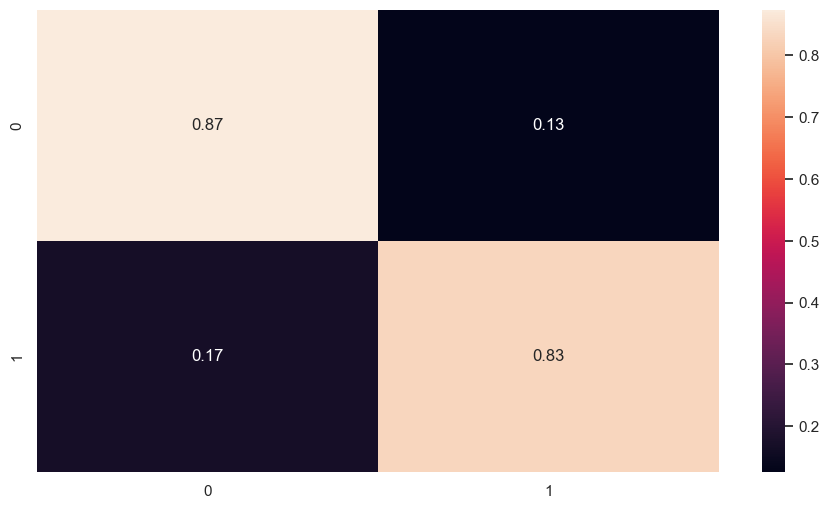

In [28]:
conf_mat = confusion_matrix(y_test, y_pred,normalize='true')
sns.heatmap(conf_mat, annot=True)

So far the performance of the Logistic regression model seems pretty good. You can try to adjust the parameters to potentially improve the performance. Explore the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for the options.

---

### k-Nearest Neighbors
k-Nearest Neighbors classifier is under the neighbors class of methods. Let's try the same classification task using this method, and compare the performance with the Logistic Regression model.

The `kNeighborsClassifier` requires numerical attributes for the classification task, but since the training and testing data has already been preprocessed previously with the one-hot-encoding format for the categorical attributes (which are in numerical now), let's try using that data and observer the performance:

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_onehot, y_ovr_samp)


KNeighborsClassifier()

In [30]:
#Testing time may take long
print('Training accuracy: ', knn.score(X_train_onehot,y_ovr_samp))
print('Testing accuracy: ', knn.score(X_test_preprocess, y_test))

Training accuracy:  0.9383575030293554
Testing accuracy:  0.8338593509751557


In [31]:
knn_pred = knn.predict(X_test_preprocess)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90     10965
           1       0.35      0.57      0.44      1392

    accuracy                           0.83     12357
   macro avg       0.65      0.72      0.67     12357
weighted avg       0.87      0.83      0.85     12357



Notice that more time is needed to do the evaluation and prediction. This is because knn is an instance-based method where most of the computation happens during prediction.

<AxesSubplot: >

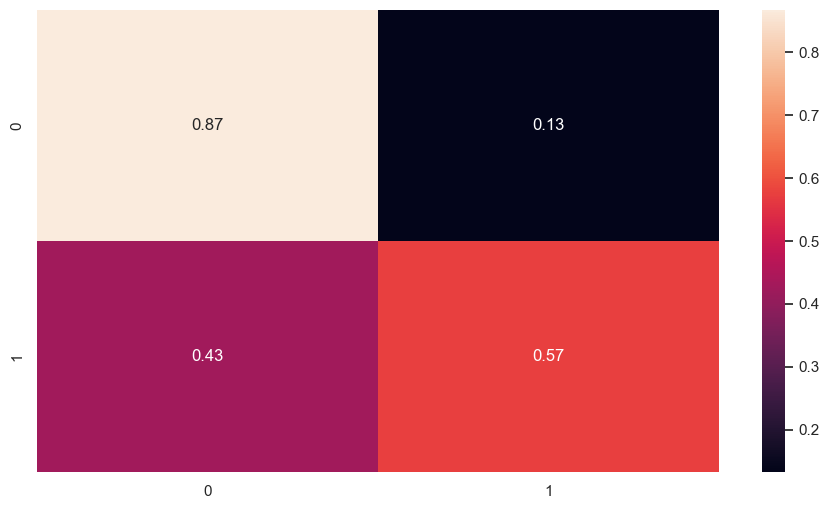

In [32]:
knn_conf_mat = confusion_matrix(y_test, knn_pred,normalize='true')
sns.heatmap(knn_conf_mat, annot=True)

By observing the computed metrics of the model and its the differences with the Logistic Regression model, you will see that the model may under-perform for the class with smaller amount of samples. Recall that we are using the data where the categorical attributes are in one-hot-encoding format which has high sparsity, hence negatively affects the Euclidean Distance computed to identify the nearest neighbor. Let's do a quick rectification by only using the numerical attributes to "train" the knn model:

Training accuracy:  0.9317515537661728
Testing accuracy:  0.8481832159909363
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10965
           1       0.41      0.83      0.55      1392

    accuracy                           0.85     12357
   macro avg       0.69      0.84      0.73     12357
weighted avg       0.91      0.85      0.87     12357



<AxesSubplot: >

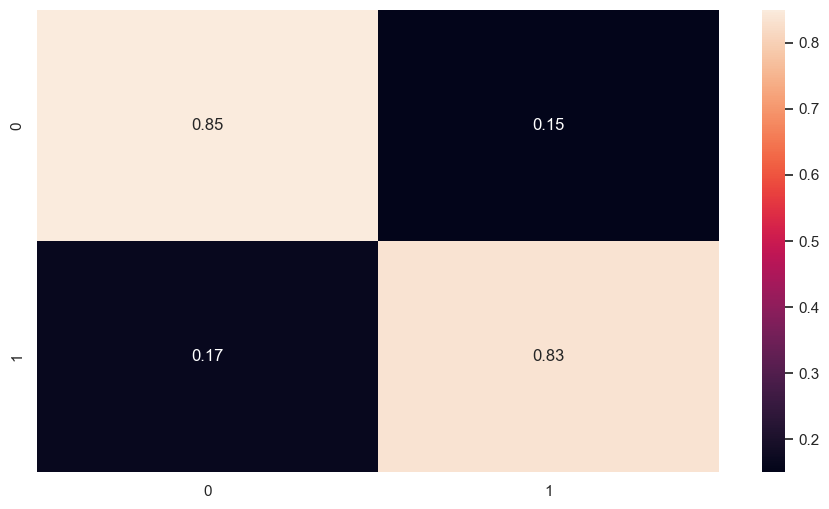

In [33]:
knn_num = KNeighborsClassifier(n_neighbors=5)
knn_num.fit(X_train_onehot[num_attributes], y_ovr_samp)
print('Training accuracy: ', knn_num.score(X_train_onehot[num_attributes],y_ovr_samp))
print('Testing accuracy: ', knn_num.score(X_test_preprocess[num_attributes], y_test))
knn_num_pred = knn_num.predict(X_test_preprocess[num_attributes])
print(classification_report(y_test, knn_num_pred))
knn_num_conf_mat = confusion_matrix(y_test, knn_num_pred,normalize='true')
sns.heatmap(knn_num_conf_mat, annot=True)

The model immediately performs better with the appropriate attributes. Other than that, the `k` parameter is also crucial for kNN model. We can investigate the best `k` by training multiple models and comparing their error rates:

Testing accuracy 0.8375819373634378


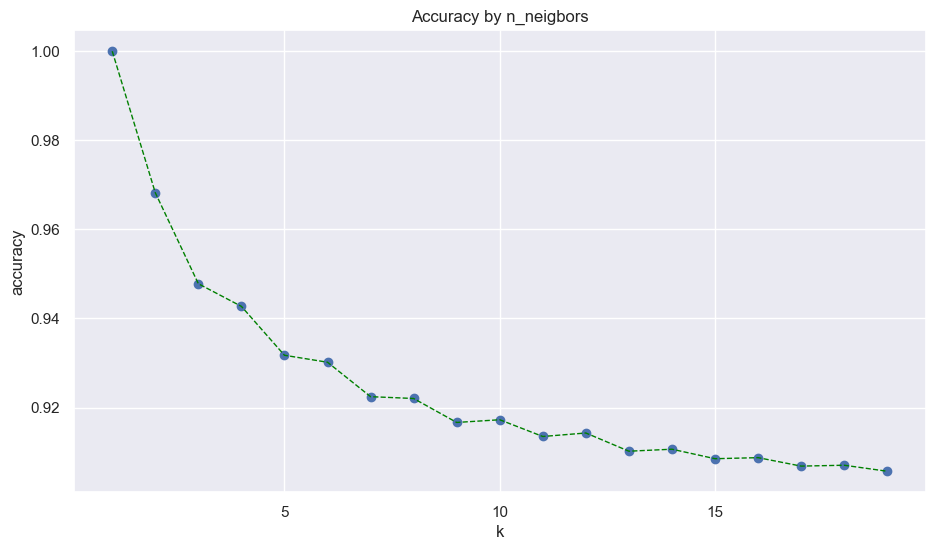

In [34]:
#long processing time due to multiple model training and prediction
k_range = range(1,20)
scores = []

for k in k_range:
    knn3 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn3.fit(X_train_onehot[num_attributes], y_ovr_samp)
    knn3_pred = knn3.predict(X_train_onehot[num_attributes])
    scores.append(knn3.score(X_train_onehot[num_attributes], y_ovr_samp))
print('Testing accuracy',knn3.score(X_test_preprocess[num_attributes], y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
plt.plot(k_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)
plt.show()

The accuracy vs `k` plot can be used to choose the best `k` value as it can show the trade-off between sensitivity and generalizability. If the `k` is too small, the model overfits to the training data and will perform very poorly on the testing / unseen data. Contrastly, if the k is too high, it will perform poorly in general. So instead of a model that gives 100% accuracy, we would select the `k` that gives a reasonable accuracy but not 'too many' `k`.
For more parameters to tune the model, explore the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

---

### Naive Bayes Classifier

The last method for this tutorial is the Naive Bayes Classifier that is based on probabilities. In scikit-learn, Naive Bayes is a class of methods, which includes Gaussian Naive Bayes (`GaussianNB`) for numerical attributes, Categorical Naive Bayes (`CategoricalNB`) for categorical attributes, and [more](https://scikit-learn.org/stable/modules/naive_bayes.html). Unfortunately, they do not provide the implementation for mixed attribute types (but there is a 3rd party implementation you can check out on [GitHub](https://github.com/remykarem/mixed-naive-bayes)).

Anyhow, let's try out both classifiers, starting with the Gaussian NB:

Training accuracy:  0.7896454676933902
Testing accuracy:  0.799789592943271
              precision    recall  f1-score   support

           0       0.96      0.80      0.88     10965
           1       0.33      0.76      0.46      1392

    accuracy                           0.80     12357
   macro avg       0.65      0.78      0.67     12357
weighted avg       0.89      0.80      0.83     12357



<AxesSubplot: >

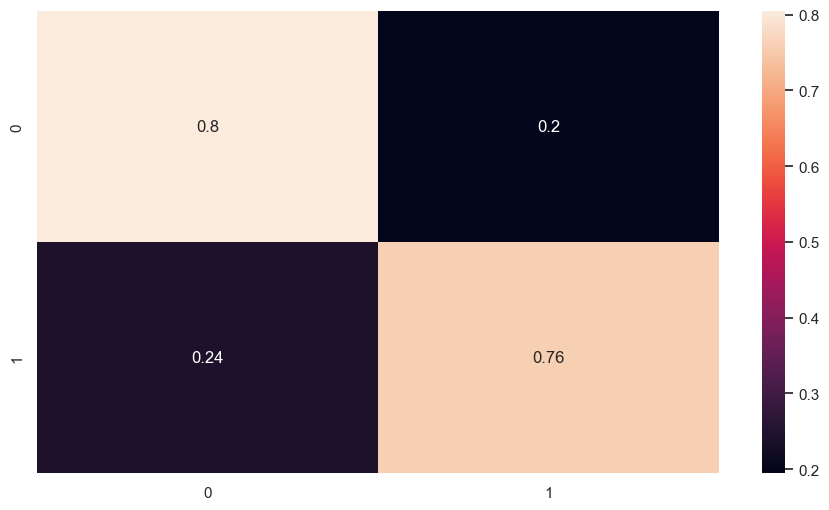

In [35]:
from sklearn.naive_bayes import GaussianNB

Gnb = GaussianNB()
Gnb.fit(X_train_onehot[num_attributes], y_ovr_samp)
print('Training accuracy: ', Gnb.score(X_train_onehot[num_attributes],y_ovr_samp))
print('Testing accuracy: ', Gnb.score(X_test_preprocess[num_attributes], y_test))
Gnb_pred = Gnb.predict(X_test_preprocess[num_attributes])
print(classification_report(y_test, Gnb_pred))
Gnb_conf_mat = confusion_matrix(y_test, Gnb_pred,normalize='true')
sns.heatmap(Gnb_conf_mat, annot=True)

You will find that the model training and testing is much faster than the other methods, but the performance may suffer due to the simplistic nature of the Naive Bayes method. Now for the categorical version, we need some additional preprocessing, specifically, to get the categorical attributes and transform them into numerical representation (not one-hot encoding). Let's start with the data preparation using the `LabelEncoder` from scikit-learn's `preprocessing`:

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()#initialize encoder
#similar process to the one-hot encoding process
X_train_rows = len(X_ovr_samp) #save the number of rows of training data
X_train_test = pd.concat(objs=[X_ovr_samp, X_test], axis=0) #concatenate the training and testing attributes
X_train_test_encoded = X_train_test[cat_attributes].apply(label_encoder.fit_transform) #encode categorical attributes to numerical format
#split the training and testing attributes back into individual variables
X_train_encoded = X_train_test_encoded[:X_train_rows]
X_test_encoded = X_train_test_encoded[X_train_rows:]

display(X_train_encoded)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,9,0,1,1,0,0,0,1,3,1
1,4,1,4,0,0,0,0,0,1,0
2,4,1,4,0,0,0,1,4,0,1
3,9,0,3,0,0,0,1,6,1,1
4,0,2,0,0,0,0,0,3,2,1
...,...,...,...,...,...,...,...,...,...,...
51161,8,2,0,0,2,0,0,9,3,1
51162,1,1,1,0,0,0,1,6,3,1
51163,1,1,4,0,0,0,0,6,2,2
51164,9,2,3,0,2,0,0,4,3,0


The categorical values are now in numerics, we can use it to train the Categorical NB model, and evaluate the performance:

Training accuracy:  0.7069342923034828
Testing accuracy:  0.7145747349680344
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     10965
           1       0.23      0.63      0.33      1392

    accuracy                           0.71     12357
   macro avg       0.58      0.68      0.58     12357
weighted avg       0.86      0.71      0.76     12357



<AxesSubplot: >

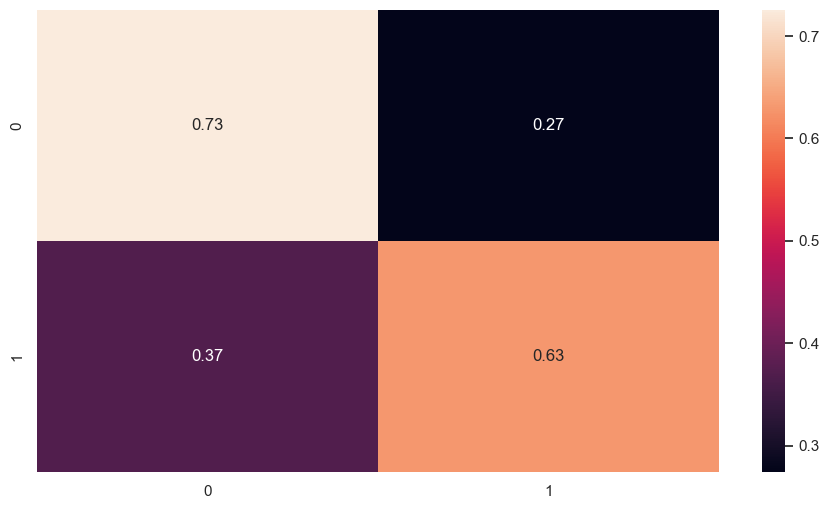

In [37]:
from sklearn.naive_bayes import CategoricalNB

Cnb = CategoricalNB()
Cnb.fit(X_train_encoded, y_ovr_samp)
print('Training accuracy: ', Cnb.score(X_train_encoded,y_ovr_samp))
print('Testing accuracy: ', Cnb.score(X_test_encoded, y_test))
Cnb_pred = Cnb.predict(X_test_encoded)
print(classification_report(y_test, Cnb_pred))
Cnb_conf_mat = confusion_matrix(y_test, Cnb_pred,normalize='true')
sns.heatmap(Cnb_conf_mat, annot=True)

Up till this point various methods has been tested. It is best to gather the results into a tabular format for a direct comparison. <br>
In the end, which model performed better?

In [38]:
models = ['Logistic Regression', 'k-NN with Cat', 'k-NN', 'Gaussian NB', 'Categorical NB']

LR_tra_acc = logreg.score(X_train_onehot,y_ovr_samp)
knn_tra_acc = knn.score(X_train_onehot,y_ovr_samp)
knn_num_tra_acc = knn_num.score(X_train_onehot[num_attributes],y_ovr_samp)
Gnb_tra_acc = Gnb.score(X_train_onehot[num_attributes],y_ovr_samp)
Cnb_tra_acc =  Cnb.score(X_train_encoded,y_ovr_samp)

LR_test_acc = logreg.score(X_test_preprocess,y_test)
knn_test_acc = knn.score(X_test_preprocess,y_test)
knn_num_test_acc = knn_num.score(X_test_preprocess[num_attributes],y_test)
Gnb_test_acc = Gnb.score(X_test_preprocess[num_attributes],y_test)
Cnb_test_acc =  Cnb.score(X_test_encoded,y_test)

results = [[models[0],LR_tra_acc,LR_test_acc],
           [models[1],knn_tra_acc,knn_test_acc],
           [models[2],knn_num_tra_acc,knn_num_test_acc],
           [models[3],Gnb_tra_acc,Gnb_test_acc],
           [models[4],Cnb_tra_acc,Cnb_test_acc]]

results_table = pd.DataFrame(results, columns=['Model', 'Training Acc.', 'Testing Acc.'])
display(results_table)


,Model,Training Acc.,Testing Acc.
0,Logistic Regression,0.891784,0.869062
1,k-NN with Cat,0.938358,0.833859
2,k-NN,0.931752,0.848183
3,Gaussian NB,0.789645,0.799790
4,Categorical NB,0.706934,0.714575


---

# E-Learning Submission Task

On a **separate Python notebook** perform classification using *Logistic Regression, k-Nearest Neighbor, and Naive Bayes Classifier* on the given [Early Risk Diabetes](https://www.kaggle.com/datasets/tanshihjen/early-stage-diabetes-risk-prediction?resource=download) dataset. Perform the necessary exploration and preprocessing to support the respective classifier training, and compare the *accuracy, precision, recall, and confusion matrix* to find out the best performing method. You may include addition experiments to find the best parameters for the models. <br>
Name your notebook using your student ID and lab section as follows: *Lab6_ID_LabSection.zip (e.g. Lab6_1001101100_TT1L.zip)* then submit the file by 03/01/2024 (Wednesday), 11.59pm for your Week 8 Tutorial attendance.

---
